In [1]:
import numpy as np
import matplotlib.pyplot as plt

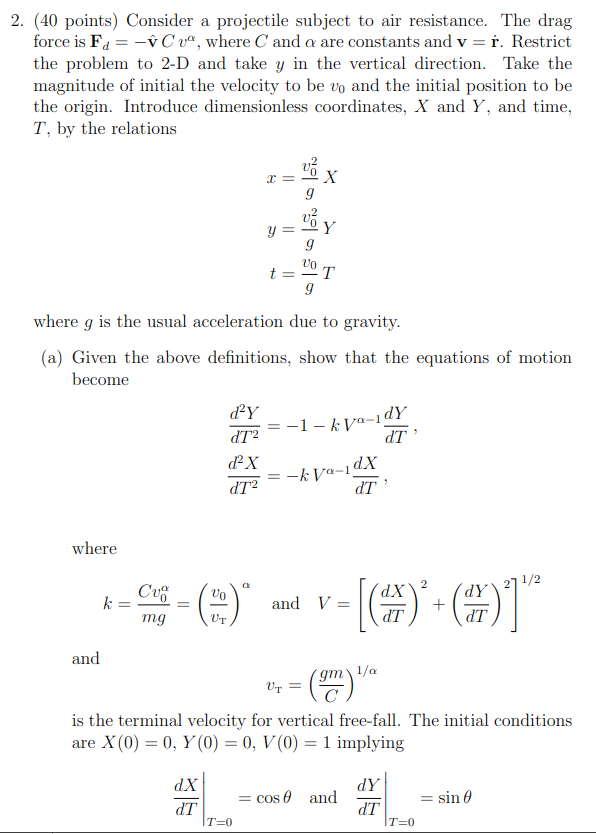
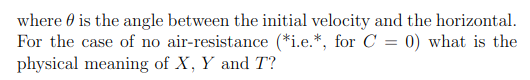

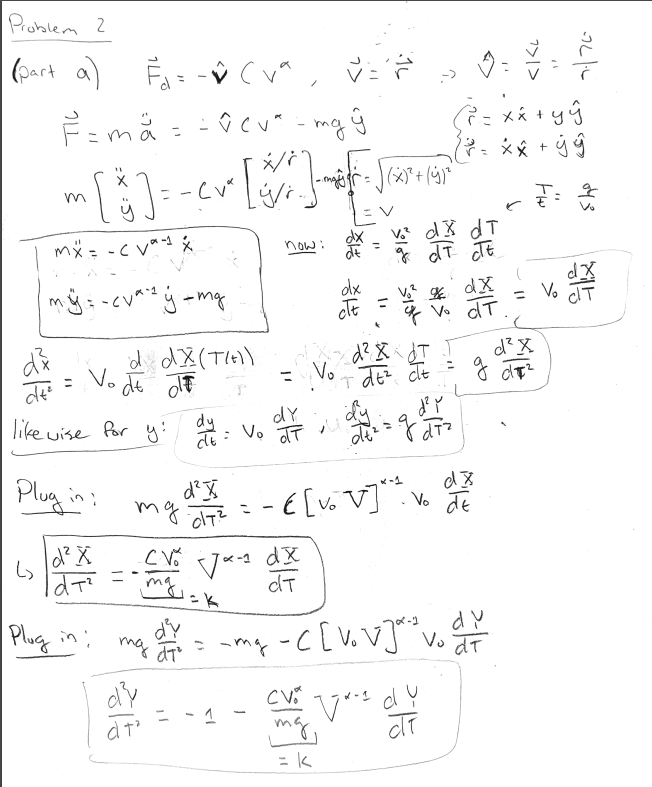
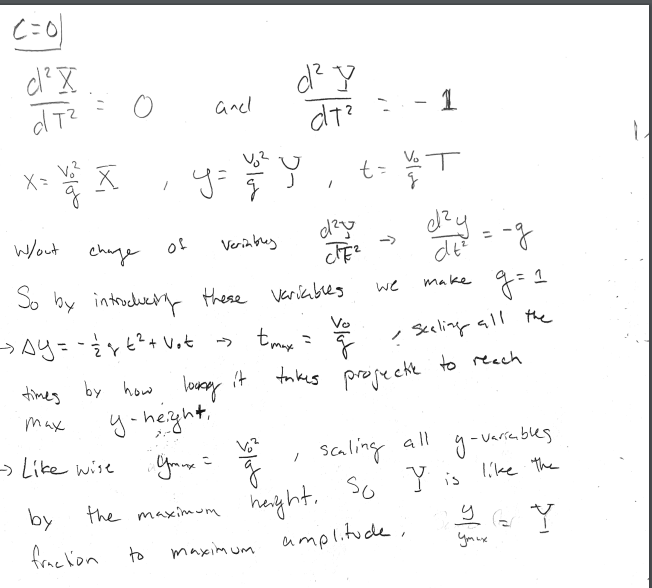
Not like, is the fraction to max amplitude and same goes for the time!

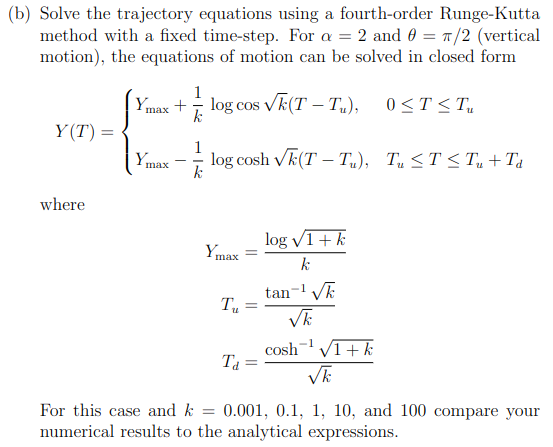
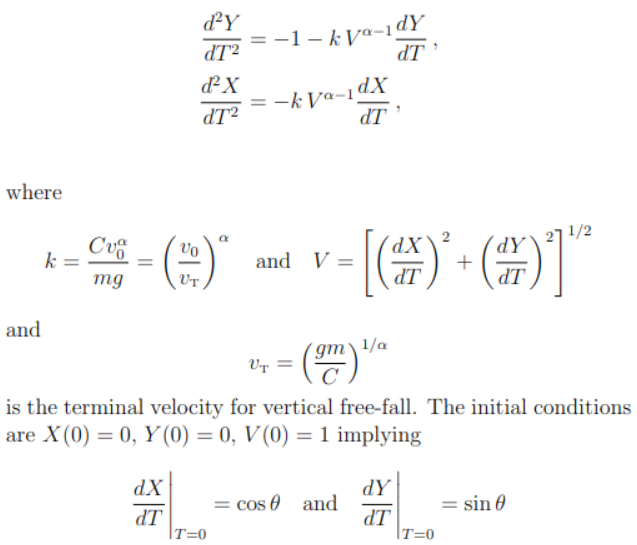

Text(0, 0.5, 'Y')

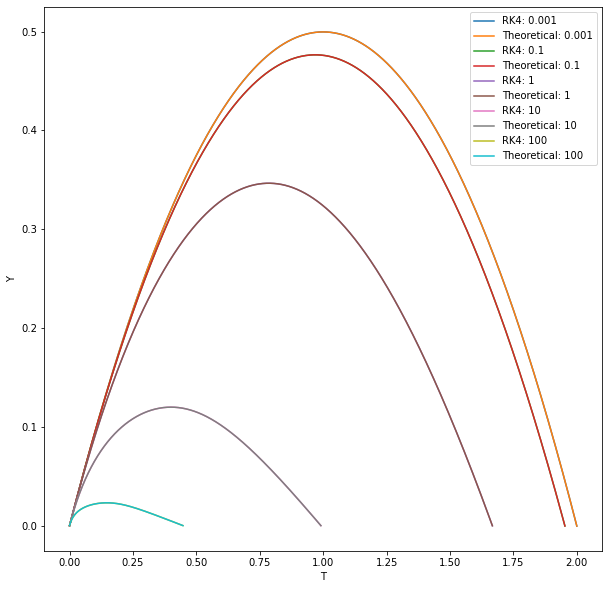

In [5]:
def calc_Y(k):
    
    def RK4(step,tbounds,y0,diffeq):
        t0, tf = tbounds[0], tbounds[1]
        def yn_1(tn,yn):
            k1 = step*diffeq(tn,yn)
            k2 = step*diffeq(tn + 0.5*step, yn + 0.5*k1)
            k3 = step*diffeq(tn + 0.5*step, yn + 0.5*k2)
            k4 = step*diffeq(tn + step, yn + k3)
            return yn + (k1/6+k2/3+k3/3+k4/6)

        ts = np.arange(t0,tf+step,step)
        yn=y0
        ys = []
        for t in ts:
            ys.append(yn)
            yn1 = yn_1(t,yn)
            yn = yn1
        return ts,ys

    #vertical motion only don't consider the x-direction, it is 0!
    def VY(t,VY):
        #VY_dot = -1 - k * abs(VY)**(alpha-1) * VY
        return -1 - k*(np.absolute(VY)**(2-1))*VY 
    
    def Y_theory(T):
        tu = np.arctan(np.sqrt(k))/np.sqrt(k)
        td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)
        Ymax = np.log(np.sqrt(1+k))/k
        T_split = T[T<=tu]
        T_split2 = T[T>tu]
        Y_left = Ymax + np.log(np.cos(np.sqrt(k)*(T_split-tu)))/k #took derivative of analytical solution
        Y_right = Ymax - np.log(np.cosh(np.sqrt(k)*(T_split2-tu)))/k
        return np.concatenate((Y_left,Y_right),axis=None)
    
    Tu = np.arctan(np.sqrt(k))/np.sqrt(k)
    Td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)

    step_size = 0.001
    tbounds = (0,Tu+Td) #t0, tf
    VY0 = 1             #why is this 1...? means it starts at max velocity i think
    Ts, VYs = RK4(step_size,tbounds,VY0,VY)
        
    distance_traveled = 0
    ds = [0]

    for i in range(len(VYs)-1): #compute the area under VY curve = distance traveled in one time step
        distance_traveled += (Ts[i+1]-Ts[i])/(2) * (VYs[i+1]+VYs[i]) #area of trapezoid
        ds.append(distance_traveled)

    return Ts, ds, Y_theory(Ts)

plt.figure(figsize=(10,10))

for k in [0.001,0.1,1,10,100]:
    tk, dsk, Ytheoryk = calc_Y(k)
    plt.plot(tk,dsk,label=f'RK4: {k}')
    plt.plot(tk,Ytheoryk,label=f'Theoretical: {k}')
plt.legend()
plt.xlabel('T')
plt.ylabel('Y')


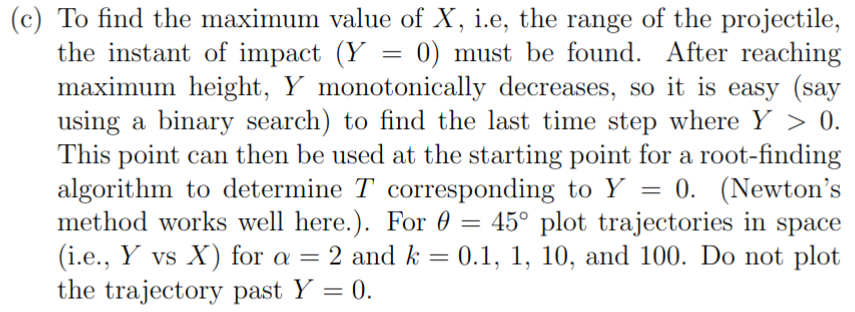

Max X distance for 0.001: 0.9922126811455192
Max X distance for 0.1: 0.9221806660450588
Max X distance for 1: 0.5856459140330951
Max X distance for 10: 0.15880727399394043
Max X distance for 100: 0.025592302296231797


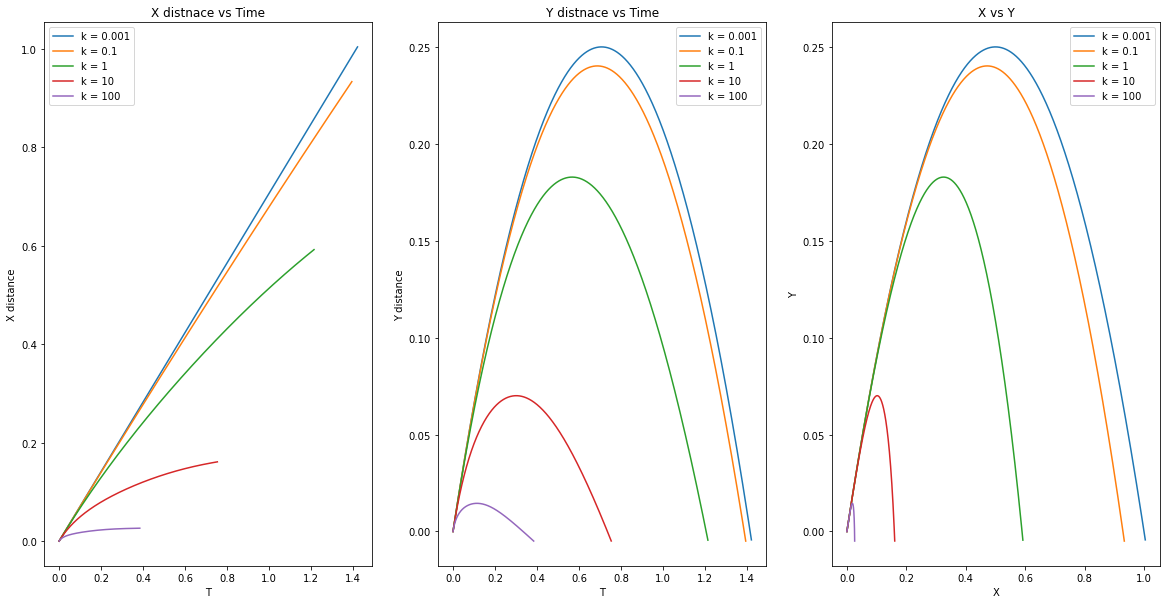

In [3]:
#part C
def calc_XY(k,alpha,launch_angle):

    def RK4_coupled(step,tbounds,x0,y0,dq1,dq2,alpha):
        t0, tf = tbounds[0], tbounds[1]
        def Eq_n_1(tn,xn,yn): #dq1 goes w y and dq2 goes w x so i am consistant
            k1 = step*dq1(tn,xn,yn,alpha)
            l1 = step*dq2(tn,xn,yn,alpha)
            
            k2 = step*dq1(tn + 0.5*step, xn + 0.5*k1, yn + 0.5*l1,alpha)
            l2 = step*dq2(tn + 0.5*step, xn + 0.5*k1, yn + 0.5*l1,alpha)
            
            k3 = step*dq1(tn + 0.5*step, xn + 0.5*k2, yn + 0.5*l2,alpha)
            l3 = step*dq2(tn + 0.5*step, xn + 0.5*k2, yn + 0.5*l2,alpha)
            
            k4 = step*dq1(tn + step, xn + k3, yn + l3,alpha)
            l4 = step*dq2(tn + step, xn + k3, yn + l3,alpha)
            return (xn + (k1/6+k2/3+k3/3+k4/6)), (yn + (l1/6+l2/3+l3/3+l4/6))

        ts = np.arange(t0,tf+step,step)
        Vxn=x0
        Vyn=y0
        Vxs = []
        Vys = []
        for t in ts:
            Vxs.append(Vxn)
            Vys.append(Vyn)
            Vxn1, Vyn1 = Eq_n_1(t,Vxn,Vyn)
            Vxn = Vxn1
            Vyn = Vyn1
        return ts,Vxs,Vys
    
    def VX_dot(T,VX,VY,alpha):
        return -k*(np.sqrt(VX**2 + VY**2)**(alpha-1))*VX
    
    def VY_dot(T,VX,VY,alpha):
        return -1-k*(np.sqrt(VX**2 + VY**2)**(alpha-1))*VY
    
    Tu = np.arctan(np.sqrt(k))/np.sqrt(k)
    Td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)
    step_size = 0.001
    tbounds = (0,Tu+Td) #t0, tf
    
    VX0 = np.cos(launch_angle)#1/np.sqrt(2)
    VY0 = np.sin(launch_angle)#1/np.sqrt(2)
    
    Ts, VXs, VYs = RK4_coupled(step_size,tbounds,VX0,VY0,VX_dot,VY_dot,alpha)
    
    xdist = 0
    xds = [xdist]
    ydist = 0
    yds = [ydist]
    
    for i in range(len(VYs)-1): #compute the area under VY curve = distance traveled in one time step
        xdist += step_size/(2) * (VXs[i+1]+VXs[i]) #area of trapezoid
        ydist += step_size/(2) * (VYs[i+1]+VYs[i]) #area of trapezoid
        xds.append(xdist)
        yds.append(ydist)
         
    return np.array(Ts), np.array(xds), np.array(yds)

def find_zero(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

fig, axs = plt.subplots(1,3, figsize=(20,10))

for k in [0.001,0.1,1,10,100]:
    t, xdists, ydists = calc_XY(k,2,np.pi/4)

    yzero, index = find_zero(ydists[10:],0)
    print(f'Max X distance for {k}: {xdists[index]}')
    mask_pos_Ys = ydists>-0.005
    
    axs[0].plot(t[mask_pos_Ys],xdists[mask_pos_Ys],label=f'k = {k}')
    
    axs[0].set_xlabel('T')
    axs[0].set_ylabel('X distance')
    axs[0].set_title('X distnace vs Time')
    
    axs[1].plot(t[mask_pos_Ys],ydists[mask_pos_Ys],label=f'k = {k}')
    
    axs[1].set_xlabel('T')
    axs[1].set_ylabel('Y distance')
    axs[1].set_title('Y distnace vs Time')  
    
    axs[2].plot(xdists[mask_pos_Ys],ydists[mask_pos_Ys], label=f'k = {k}')
    
    axs[2].set_xlabel('X')
    axs[2].set_ylabel('Y')
    axs[2].set_title('X vs Y') 
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

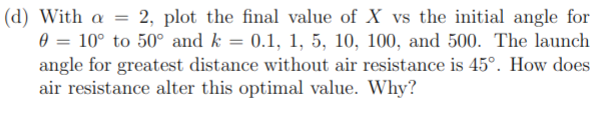


Increasing the air resistance makes your optimal launch angle decrease. Meaning you want to launch at a lower 
angle for if there is a lot of air resistance. There is a trade off between the hang time of the projectile and
horizontal velocity of the particle. Air resistance will decrease both it is taking energy out of the system. But,
if you decrease your launch angle you are increasing the horizontal velocity of the particle while your hangtime,
will be getting decreased regardless. So, finding the optimal angle between decreasing launch angle (to increase
horizontal velocity to make up for the air slowing you down) and the loss in hang time yields the exact new 
launch angle needed to maximize the x distance.



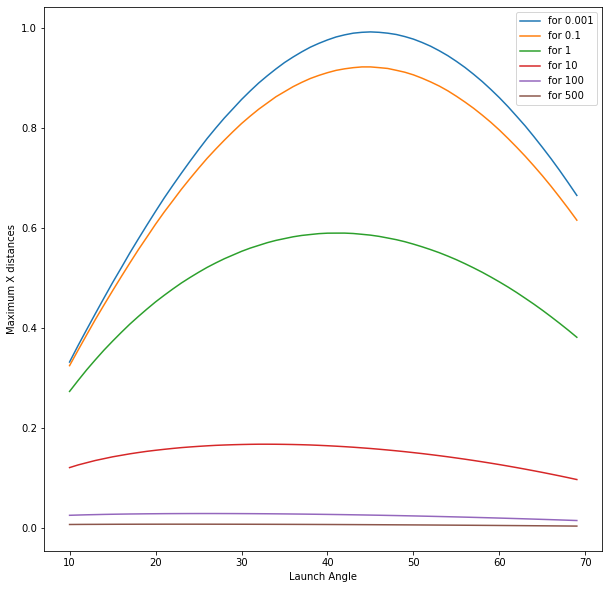

In [9]:
#part D

def find_zero(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

plt.figure(figsize=(10,10))
for k in [0.001,0.1,1,10,100,500]:
    angles = np.arange(10,70,1)
    max_xs = []
    for angle in angles:
        t, xdists, ydists = calc_XY(k,2,np.radians(angle))
        
        yzero, index = find_zero(ydists[10:],0)
        max_x = xdists[index]
        max_xs.append(max_x)
    plt.plot(angles,max_xs,label=f'for {k}')

plt.legend()
plt.xlabel('Launch Angle')
plt.ylabel('Maximum X distances')
string = '''
Increasing the air resistance makes your optimal launch angle decrease. Meaning you want to launch at a lower 
angle for if there is a lot of air resistance. There is a trade off between the hang time of the projectile and
horizontal velocity of the particle. Air resistance will decrease both it is taking energy out of the system. But,
if you decrease your launch angle you are increasing the horizontal velocity of the particle while your hangtime,
will be getting decreased regardless. So, finding the optimal angle between decreasing launch angle (to increase
horizontal velocity to make up for the air slowing you down) and the loss in hang time yields the exact new 
launch angle needed to maximize the x distance.
'''
print(string)

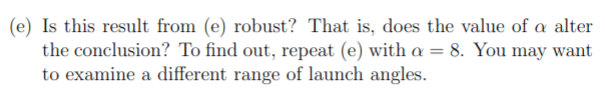


If air drag effected the particle instead of by the square of the velocity it would change how you think about
the trade off between hang time and the horizontal velocity. It is hard to think of a physical reason why,
v^2 makes sense because the work done on the object is equal to the change in kinetic energy. That is why you have
the v^2. So this would be a modification to the work energy theorem or another physical process inducing the
behavior. Evidently it is the opposite of the last question, for thicker air the launch angle increases. Now,
you have more hang time and less horizontal velocity.

NOTE: Not sure hwy the values have a cut off, could be some sort of big number error in the calculation. Not
completely sure but you can still see the behavior.



Text(0, 0.5, 'Maximum X distances')

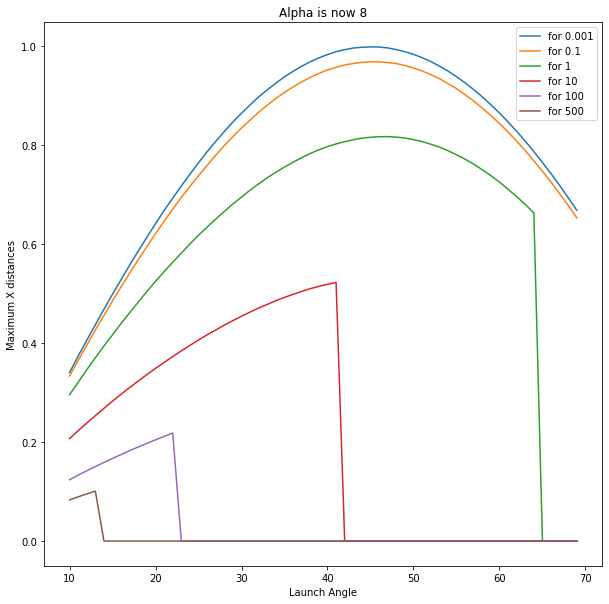

In [12]:
def find_zero(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

plt.figure(figsize=(10,10))
for k in [0.001,0.1,1,10,100,500]:
    angles = np.arange(10,70,1)
    max_xs = []
    for angle in angles:
        t, xdists, ydists = calc_XY(k,8,np.radians(angle)) #alpha is now 8
        
        yzero, index = find_zero(ydists[1:],0)
        max_x = xdists[index]
        max_xs.append(max_x)
    plt.plot(angles,max_xs,label=f'for {k}')
string = '''
If air drag effected the particle instead of by the square of the velocity it would change how you think about
the trade off between hang time and the horizontal velocity. It is hard to think of a physical reason why,
v^2 makes sense because the work done on the object is equal to the change in kinetic energy. That is why you have
the v^2. So this would be a modification to the work energy theorem or another physical process inducing the
behavior. Evidently it is the opposite of the last question, for thicker air the launch angle increases. Now,
you have more hang time and less horizontal velocity.

NOTE: Not sure hwy the values have a cut off, could be some sort of big number error in the calculation. Not
completely sure but you can still see the behavior.
'''
print(string)
plt.legend()
plt.title('Alpha is now 8')
plt.xlabel('Launch Angle')
plt.ylabel('Maximum X distances')

In [ ]:
#legacy code

#     def VY_theory(T): #theoretical velocity curve
#         tu = np.arctan(np.sqrt(k))/np.sqrt(k)
#         td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)
#         T_split = T[T<=tu]
#         T_split2 = T[T>tu]
#         VY_left = -np.tan(np.sqrt(k)*(T_split-tu))/(np.sqrt(k)) #took derivative of analytical solution
#         VY_right = -np.tanh(np.sqrt(k)*(T_split2-tu))/(np.sqrt(k))
#         return np.concatenate((VY_left,VY_right),axis=None)

#     fig, axs = plt.subplots(1,2,figsize = (20,10))
    
#     axs[0].plot(Ts,VYs,label='RK4')
#     axs[0].plot(Ts,VY_theory(Ts),label='Theory')
#     axs[0].legend()
#     axs[0].set_title('Velocity of RK4 and Theory')
#     axs[0].set_xlabel('T')
#     axs[0].set_ylabel('VY')
    
    #now compute the area under the velocity curve
    #Area can be calculated perfectly since it is discrete
    #Thus we can calculate: 
    #distance traveled in one time step = VYn * deltaT + deltaT * (VY_n+1 - VY_n)

    
#     axs[1].plot(Ts,ds,label='RK4')
#     axs[1].plot(Ts,Y_theory(Ts),label='Theory')
#     axs[1].legend()
#     axs[1].set_title('Distance of RK4 and Theory')
#     axs[1].set_xlabel('T')
#     axs[1].set_ylabel('Y')